In [23]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


High vs Pred:
PSNR: 24.487533569667654 dB
SSIM: 0.8275017453536428
High vs Low:
PSNR: inf dB
SSIM: 1.0


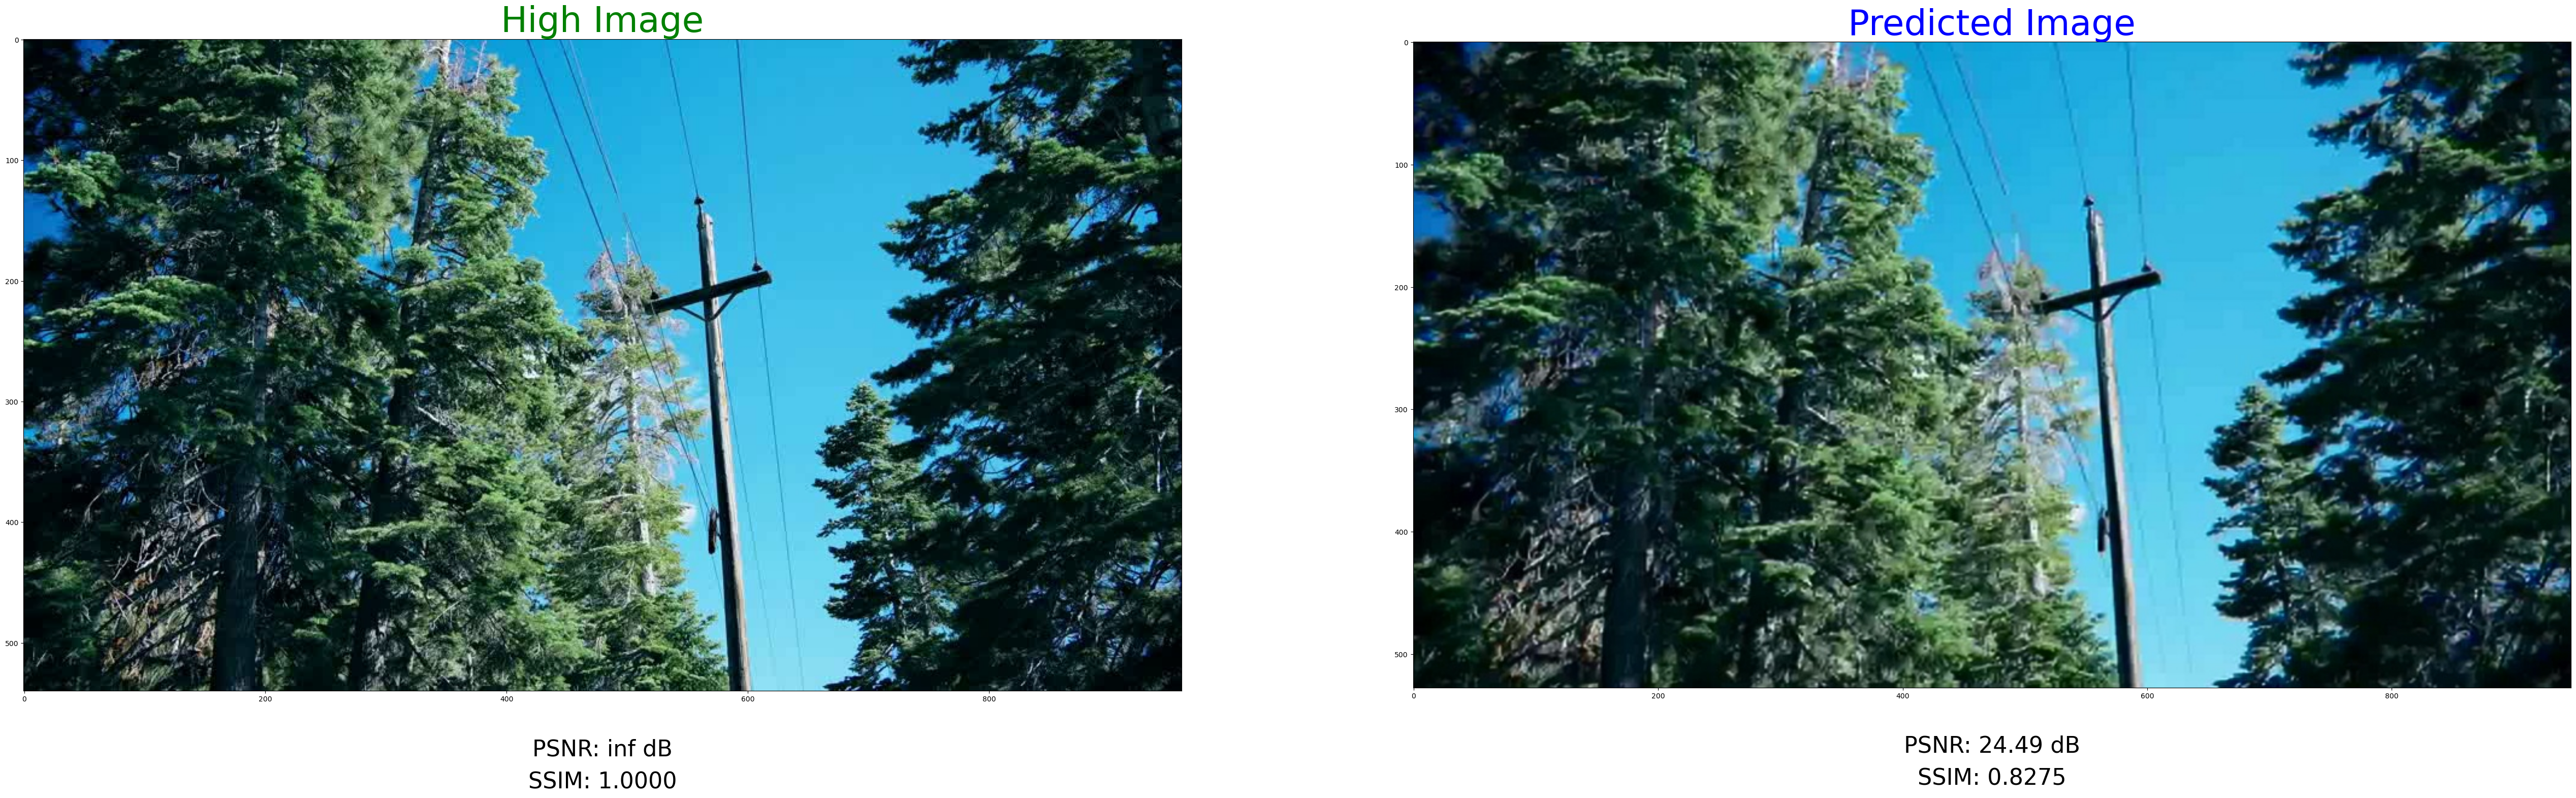

: 

In [101]:
def plot_images(high_img, sr_img,psnr_HP,ssim_HP,psnr_HH,ssim_HH):
    high = cv2.imread(high_img)
    sr = cv2.imread(sr_img)
    
    plt.figure(figsize=(100, 100)) 
    ax1 = plt.subplot(1, 3, 1)
    plt.title('High Image', color='green', fontsize=50)
    ax1.imshow(cv2.cvtColor(high, cv2.COLOR_BGR2RGB))
    # Add PSNR and SSIM values as text annotations
    text_y = -0.1  # Adjust the y-coordinate value to move the text lower
    ax1.text(0.5, text_y, f'PSNR: {psnr_HH:.2f} dB', color='black', fontsize=32, transform=ax1.transAxes, ha='center')
    ax1.text(0.5, text_y-0.05, f'SSIM: {ssim_HH:.4f}', color='black', fontsize=32,transform=ax1.transAxes, ha='center')

    """ax2 = plt.subplot(1, 3, 2)
    plt.title('Low Image', color='red', fontsize=20)
    ax2.imshow(cv2.cvtColor(lr, cv2.COLOR_BGR2RGB))
    # Add PSNR and SSIM values as text annotations
    text_y = -0.2  # Adjust the y-coordinate value to move the text lower
    ax2.text(0.5, text_y, f'PSNR: {psnr_HL:.2f} dB', color='black', fontsize=16, transform=ax2.transAxes, ha='center')
    ax2.text(0.5, text_y-0.1, f'SSIM: {ssim_HL:.4f}', color='black', fontsize=16,transform=ax2.transAxes, ha='center')"""


    ax2 = plt.subplot(1, 3, 2)
    plt.title('Predicted Image', color='blue', fontsize=50)
    ax2.imshow(cv2.cvtColor(sr, cv2.COLOR_BGR2RGB))
    # Add PSNR and SSIM values as text annotations
    text_y = -0.1  # Adjust the y-coordinate value to move the text lower
    ax2.text(0.5, text_y, f'PSNR: {psnr_HP:.2f} dB', color='black', fontsize=32, transform=ax2.transAxes, ha='center')
    ax2.text(0.5, text_y-0.05, f'SSIM: {ssim_HP:.4f}', color='black', fontsize=32,transform=ax2.transAxes, ha='center')

    plt.show()
high_img=r"E:\SR-Video-Stream\hr_frame_imges\chunk_1\frame_1.jpg"
lr_img=r"E:\SR-Video-Stream\lr_frame_imges\chunk_1\frame_1.jpg"
sr_img=r"E:\SR-Video-Stream\client_storage\frame_0.jpg"

# Load images using cv2.imread and convert to TensorFlow tensors
high = cv2.imread(high_img)
lr= cv2.imread(lr_img)
sr = cv2.imread(sr_img)
high_tensor = tf.convert_to_tensor(high)
low_tensor= tf.convert_to_tensor(lr)
sr_tensor = tf.convert_to_tensor(sr)

# Convert the data type of sr_tensor to match high_tensor
sr_tensor = tf.image.convert_image_dtype(sr_tensor, high_tensor.dtype)
#low_tensor= tf.image.convert_image_dtype(low_tensor, high_tensor.dtype)

# Resize images if they have different dimensions
if high.shape != sr.shape:
    high_tensor = tf.image.resize(high_tensor, (sr.shape[0], sr.shape[1]))
    high = cv2.resize(high, (sr.shape[1], sr.shape[0]))



# Calculate PSNR of High vs Pred ##########################################################
psnr_HP = peak_signal_noise_ratio(high_tensor.numpy(), sr_tensor.numpy(), data_range=255)
print("High vs Pred:")
print('PSNR:', psnr_HP, 'dB')

high_gery=cv2.cvtColor(high,cv2.COLOR_BGR2GRAY) 
sr_gery=cv2.cvtColor(sr,cv2.COLOR_BGR2GRAY) 

# Calculate SSIM
ssim_HP = structural_similarity(high_gery, sr_gery, data_range=255)
print("SSIM:", ssim_HP)
###########################################################################################

# Resize images if they have different dimensions
high_tensor = tf.image.resize(high_tensor, (lr.shape[0], lr.shape[1]))
high = cv2.resize(high, (sr.shape[1], sr.shape[0]))

psnr_HH = peak_signal_noise_ratio(high_tensor.numpy(), high_tensor.numpy(), data_range=255)
print("High vs Low:")
print('PSNR:', psnr_HH, 'dB')

high_gery=cv2.cvtColor(high,cv2.COLOR_BGR2GRAY) 
lr_gery=cv2.cvtColor(lr,cv2.COLOR_BGR2GRAY) 

# Calculate SSIM
ssim_HH = structural_similarity(high_gery, high_gery, data_range=255)
print("SSIM:", ssim_HH)

plot_images(high_img, sr_img,psnr_HP,ssim_HP,psnr_HH,ssim_HH)